# EDA 2

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('data/data.csv')
target = pd.read_csv('data/target.csv')

In [11]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Columns: 2800 entries, 800.0 to 2199.5
dtypes: float64(2800)
memory usage: 3.9 MB


,800.0,800.5,801.0,801.5,802.0,802.5,803.0,803.5,804.0,804.5,...,2195.0,2195.5,2196.0,2196.5,2197.0,2197.5,2198.0,2198.5,2199.0,2199.5
0,-0.531754,-0.531829,-0.531904,-0.531969,-0.532023,-0.532063,-0.532094,-0.532124,-0.532158,-0.532207,...,0.534428,0.534308,0.534110,0.533800,0.533377,0.532879,0.532365,0.532084,0.531923,0.531754
1,-0.535849,-0.535929,-0.536009,-0.536084,-0.536147,-0.536197,-0.536240,-0.536280,-0.536324,-0.536371,...,0.539056,0.538870,0.538606,0.538229,0.537733,0.537158,0.536567,0.536240,0.536048,0.535849
2,-0.536032,-0.536106,-0.536180,-0.536250,-0.536308,-0.536354,-0.536396,-0.536436,-0.536482,-0.536534,...,0.538636,0.538466,0.538239,0.537917,0.537499,0.537027,0.536561,0.536313,0.536176,0.536032
3,-0.533754,-0.533822,-0.533890,-0.533949,-0.533995,-0.534028,-0.534051,-0.534070,-0.534095,-0.534127,...,0.536885,0.536659,0.536368,0.535977,0.535483,0.534936,0.534388,0.534094,0.533928,0.533754
4,-0.535657,-0.535726,-0.535793,-0.535851,-0.535899,-0.535933,-0.535959,-0.535982,-0.536008,-0.536045,...,0.538168,0.538032,0.537828,0.537524,0.537115,0.536647,0.536181,0.535934,0.535800,0.535657


In [12]:
target.info()
target.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Glucose (g/L)  181 non-null    float64
 1   Lactate (g/L)  181 non-null    float64
 2   Ethanol (g/L)  181 non-null    float64
 3   Acetate (g/L)  181 non-null    float64
 4   Biomass (g/L)  181 non-null    float64
 5   Formate (g/L)  181 non-null    float64
dtypes: float64(6)
memory usage: 8.6 KB


,Glucose (g/L),Lactate (g/L),Ethanol (g/L),Acetate (g/L),Biomass (g/L),Formate (g/L)
0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.0,0.0,0.0,0.0,0.0,0.0
2,25.0,0.0,0.0,0.0,0.0,0.0
3,30.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0


# do preprocessing here

In [13]:
data = data.dropna()
data = data.drop_duplicates()

In [14]:
data.describe()

,800.0,800.5,801.0,801.5,802.0,802.5,803.0,803.5,804.0,804.5,...,2195.0,2195.5,2196.0,2196.5,2197.0,2197.5,2198.0,2198.5,2199.0,2199.5
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,...,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,-0.514593,-0.514791,-0.514988,-0.515177,-0.515350,-0.515507,-0.515653,-0.515794,-0.515939,-0.516093,...,0.517935,0.517729,0.517447,0.517040,0.516505,0.515890,0.515269,0.514937,0.514766,0.514593
std,0.054325,0.054220,0.054117,0.054016,0.053916,0.053818,0.053722,0.053628,0.053535,0.053442,...,0.053791,0.053850,0.053912,0.053982,0.054064,0.054154,0.054244,0.054291,0.054309,0.054325
min,-0.691231,-0.691311,-0.691388,-0.691457,-0.691510,-0.691546,-0.691574,-0.691604,-0.691645,-0.691700,...,0.372773,0.372465,0.372063,0.371468,0.370655,0.369745,0.368810,0.368291,0.367979,0.367659
25%,-0.532690,-0.532784,-0.532882,-0.532973,-0.533052,-0.533117,-0.533171,-0.533223,-0.533277,-0.533331,...,0.490155,0.489841,0.489507,0.489029,0.488368,0.487602,0.486853,0.486510,0.486508,0.486550
50%,-0.530528,-0.530605,-0.530679,-0.530747,-0.530804,-0.530850,-0.530891,-0.530931,-0.530975,-0.531031,...,0.532993,0.532918,0.532792,0.532521,0.532085,0.531654,0.531187,0.530920,0.530692,0.530528
75%,-0.486550,-0.486860,-0.487172,-0.487486,-0.487790,-0.488073,-0.488332,-0.488569,-0.488800,-0.489048,...,0.536138,0.535768,0.535278,0.535008,0.534600,0.534111,0.533471,0.533116,0.532907,0.532690
max,-0.367659,-0.368109,-0.368536,-0.368936,-0.369316,-0.369681,-0.370038,-0.370403,-0.370779,-0.371175,...,0.692711,0.692694,0.692617,0.692445,0.692173,0.691849,0.691537,0.691383,0.691311,0.691231


No rows dropped, so target is also left unmodified.

# do feature selection here

---

# Only for ACETATE

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

bestfeatures = SelectKBest(score_func=f_regression, k=10) # select 10 best features
fit = bestfeatures.fit(data, target['Acetate (g/L)'])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score']
print(featureScores.nlargest(10, 'Score'))

       Specs      Score
2171  1885.5  40.670464
2172  1886.0  40.651331
2170  1885.0  40.558159
2173  1886.5  40.473747
2169  1884.5  40.329787
2174  1887.0  40.106032
2168  1884.0  40.006439
1208  1404.0  39.851319
1209  1404.5  39.843318
1207  1403.5  39.837946


# do feature scaling here

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

# do model selection here

# regression models

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.cross_decomposition import PLSRegression

from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error

In [41]:
# function that accepts data and target and returns the model with the best r2 score and rmse score
def best_model(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), SVR(), KNeighborsRegressor(),
              GradientBoostingRegressor(), Ridge(), Lasso(), ElasticNet(), PLSRegression()]
    
    r2_scores = []
    rmse_scores = []

    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2_scores.append(model.score(X_test, y_test))
        rmse_scores.append(np.sqrt(np.mean((y_pred - y_test) ** 2)))

    # create a list of models and their scores 
    model_scores = pd.DataFrame(sorted(list(zip([type(model).__name__ for model in models], r2_scores, rmse_scores)), key=lambda x: x[1], reverse=True), columns=['Model', 'R2 Score', 'RMSE'])

    return model_scores

In [43]:
# loop through the columns in target and find the best model for each column
for column in target.columns:
    model_scores = best_model(data, target[column].values)
    print(f'\n\n{column}:\n')
    print(model_scores)

/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.859e+00, tolerance: 3.404e+00
  model = cd_fast.enet_coordinate_descent(
/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.607e+01, tolerance: 3.404e+00
  model = cd_fast.enet_coordinate_descent(




Glucose (g/L):

                       Model  R2 Score       RMSE
0           LinearRegression  0.987055   2.079830
1                      Ridge  0.979479   2.618657
2      RandomForestRegressor  0.806917   8.032594
3  GradientBoostingRegressor  0.779496   8.584039
4      DecisionTreeRegressor  0.682253  10.304436
5        KNeighborsRegressor  0.647694  10.850354
6                 ElasticNet  0.405349  14.096613
7                      Lasso  0.297213  15.324831
8              PLSRegression  0.073863  22.237012
9                        SVR -0.478610  22.228524


/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.047e+00, tolerance: 3.901e+00
  model = cd_fast.enet_coordinate_descent(
/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.567e+01, tolerance: 3.901e+00
  model = cd_fast.enet_coordinate_descent(




Lactate (g/L):

                       Model  R2 Score       RMSE
0           LinearRegression  0.924297   3.153783
1                      Ridge  0.860715   4.277855
2        KNeighborsRegressor  0.729410   5.962516
3  GradientBoostingRegressor  0.637523   6.901037
4                      Lasso  0.246653   9.948817
5                 ElasticNet  0.196984  10.271551
6              PLSRegression  0.174682  13.029984
7                        SVR -0.025820  11.609390
8      RandomForestRegressor -0.121138  12.136782
9      DecisionTreeRegressor -1.674795  18.746457


Ethanol (g/L):

                       Model  R2 Score      RMSE
0           LinearRegression  0.893385  0.258570
1        KNeighborsRegressor  0.402656  0.612041
2  GradientBoostingRegressor  0.321811  0.652144
3                      Ridge  0.240405  0.690175
4      RandomForestRegressor  0.209024  0.704288
5              PLSRegression  0.161785  0.904565
6                        SVR  0.125482  0.740547
7                     

/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.683e-02, tolerance: 2.648e-02
  model = cd_fast.enet_coordinate_descent(




Biomass (g/L):

                       Model  R2 Score      RMSE
0      RandomForestRegressor  0.997958  0.052454
1  GradientBoostingRegressor  0.995304  0.079534
2                      Ridge  0.992484  0.100620
3                        SVR  0.989686  0.117874
4        KNeighborsRegressor  0.986738  0.133659
5      DecisionTreeRegressor  0.974684  0.184670
6           LinearRegression  0.974538  0.185202
7              PLSRegression  0.973971  1.650416
8                 ElasticNet  0.836144  0.469819
9                      Lasso  0.407523  0.893380


Formate (g/L):

                       Model  R2 Score      RMSE
0           LinearRegression  0.693392  0.497700
1                      Ridge  0.524587  0.619743
2        KNeighborsRegressor  0.512242  0.627737
3  GradientBoostingRegressor  0.463487  0.658364
4      RandomForestRegressor  0.454408  0.663911
5              PLSRegression  0.393258  0.972057
6                        SVR  0.269023  0.768471
7                      Lasso -0.0

### My Output:

Glucose (g/L):

| Model                    | R2 Score | RMSE      |
|--------------------------|----------|-----------|
| LinearRegression         | 0.987055 | 2.079830  |
| Ridge                    | 0.979479 | 2.618657  |
| RandomForestRegressor    | 0.806917 | 8.032594  |
| GradientBoostingRegressor| 0.779496 | 8.584039  |
| DecisionTreeRegressor    | 0.682253 | 10.304436 |
| KNeighborsRegressor      | 0.647694 | 10.850354 |
| ElasticNet               | 0.405349 | 14.096613 |
| Lasso                    | 0.297213 | 15.324831 |
| PLSRegression            | 0.073863 | 22.237012 |
| SVR                      | -0.478610| 22.228524 |

Lactate (g/L):

| Model                    | R2 Score | RMSE      |
|--------------------------|----------|-----------|
| LinearRegression         | 0.924297 | 3.153783  |
| Ridge                    | 0.860715 | 4.277855  |
| KNeighborsRegressor      | 0.729410 | 5.962516  |
| GradientBoostingRegressor| 0.637523 | 6.901037  |
| Lasso                    | 0.246653 | 9.948817  |
| ElasticNet               | 0.196984 | 10.271551 |
| PLSRegression            | 0.174682 | 13.029984 |
| SVR                      | -0.025820| 11.609390 |
| RandomForestRegressor    | -0.121138| 12.136782 |
| DecisionTreeRegressor    | -1.674795| 18.746457 |

Ethanol (g/L):

| Model                    | R2 Score | RMSE      |
|--------------------------|----------|-----------|
| LinearRegression         | 0.893385 | 0.258570  |
| KNeighborsRegressor      | 0.402656 | 0.612041  |
| GradientBoostingRegressor| 0.321811 | 0.652144  |
| Ridge                    | 0.240405 | 0.690175  |
| RandomForestRegressor    | 0.209024 | 0.704288  |
| PLSRegression            | 0.161785 | 0.904565  |
| SVR                      | 0.125482 | 0.740547  |
| Lasso                    | -0.000949| 0.792272  |
| ElasticNet               | -0.000949| 0.792272  |
| DecisionTreeRegressor    | -0.088235| 0.826095  |

Acetate (g/L):

| Model                    | R2 Score | RMSE      |
|--------------------------|----------|-----------|
| GradientBoostingRegressor| 0.640130 | 0.386067  |
| DecisionTreeRegressor    | 0.543210 | 0.434959  |
| KNeighborsRegressor      | 0.529506 | 0.441435  |
| LinearRegression         | 0.434086 | 0.484133  |
| RandomForestRegressor    | 0.421177 | 0.489624  |
| Ridge                    | 0.288360 | 0.542900  |
| PLSRegression            | 0.215290 | 0.737263  |
| SVR                      | 0.149631 | 0.593463  |
| Lasso                    | -0.004249| 0.644927  |
| ElasticNet               | -0.004249| 0.644927  |

Biomass (g/L):

| Model                    | R2 Score | RMSE      |
|--------------------------|----------|-----------|
| RandomForestRegressor    | 0.997958 | 0.052454  |
| GradientBoostingRegressor| 0.995304 | 0.079534  |
| Ridge                    | 0.992484 | 0.100620  |
| SVR                      | 0.989686 | 0.117874  |
| KNeighborsRegressor      | 0.986738 | 0.133659  |
| DecisionTreeRegressor    | 0.974684 | 0.184670  |
| LinearRegression         | 0.974538 | 0.185202  |
| PLSRegression            | 0.973971 | 1.650416  |
| ElasticNet               | 0.836144 | 0.469819  |
| Lasso                    | 0.407523 | 0.893380  |

Formate (g/L):

| Model                    | R2 Score | RMSE      |
|--------------------------|----------|-----------|
| LinearRegression         | 0.693392 | 0.497700  |
| Ridge                    | 0.524587 | 0.619743  |
| KNeighborsRegressor      | 0.512242 | 0.627737  |
| GradientBoostingRegressor| 0.463487 | 0.658364  |
| RandomForestRegressor    | 0.454408 | 0.663911  |
| PLSRegression            | 0.393258 | 0.972057  |
| SVR                      | 0.269023 | 0.768471  |
| Lasso                    | -0.004535| 0.900862  |
| ElasticNet               | -0.004535| 0.900862  |
| DecisionTreeRegressor    | -0.011980| 0.904194  |


---

In [49]:
data2 = pd.read_csv('data/data.csv')
target2 = pd.read_csv('data/target.csv')

# More preprocessing

### Baseline correction and normalization

In [50]:
# Baseline correction
data2 = data2 - data2.min()

# Normalization
data2 = data2 / data2.max()

### Noise reduction using smoothing techniques

In [51]:
# Noise reduction using smoothing techniques

# use savitzky-golay filter
from scipy.signal import savgol_filter

data2 = savgol_filter(data2, 5, 2) # window size 5, polynomial order 2

### Multiple scatter correction to reduce scattering effects

In [52]:
# Multiple scatter correction to reduce scattering effects
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
data2 = pca.fit_transform(data2)
data2 = pd.DataFrame(data2)

In [53]:
data2

,0,1,2,3
0,-8.064881,-0.194805,0.522354,-0.697570
1,-7.614407,-0.335458,0.127954,-0.516379
2,-7.595361,-0.425928,-0.137449,-0.568400
3,-7.652166,-0.945824,0.376483,-0.327592
4,-7.475612,-0.933236,0.132720,-0.319673
...,...,...,...,...
176,21.704590,-2.218468,-3.053045,-1.464580
177,23.791276,-2.731052,-3.066659,-1.658834
178,24.088727,-2.978831,-3.186834,-1.666274
179,23.769215,-2.935494,-3.127976,-1.584859


### EDA with visualisations

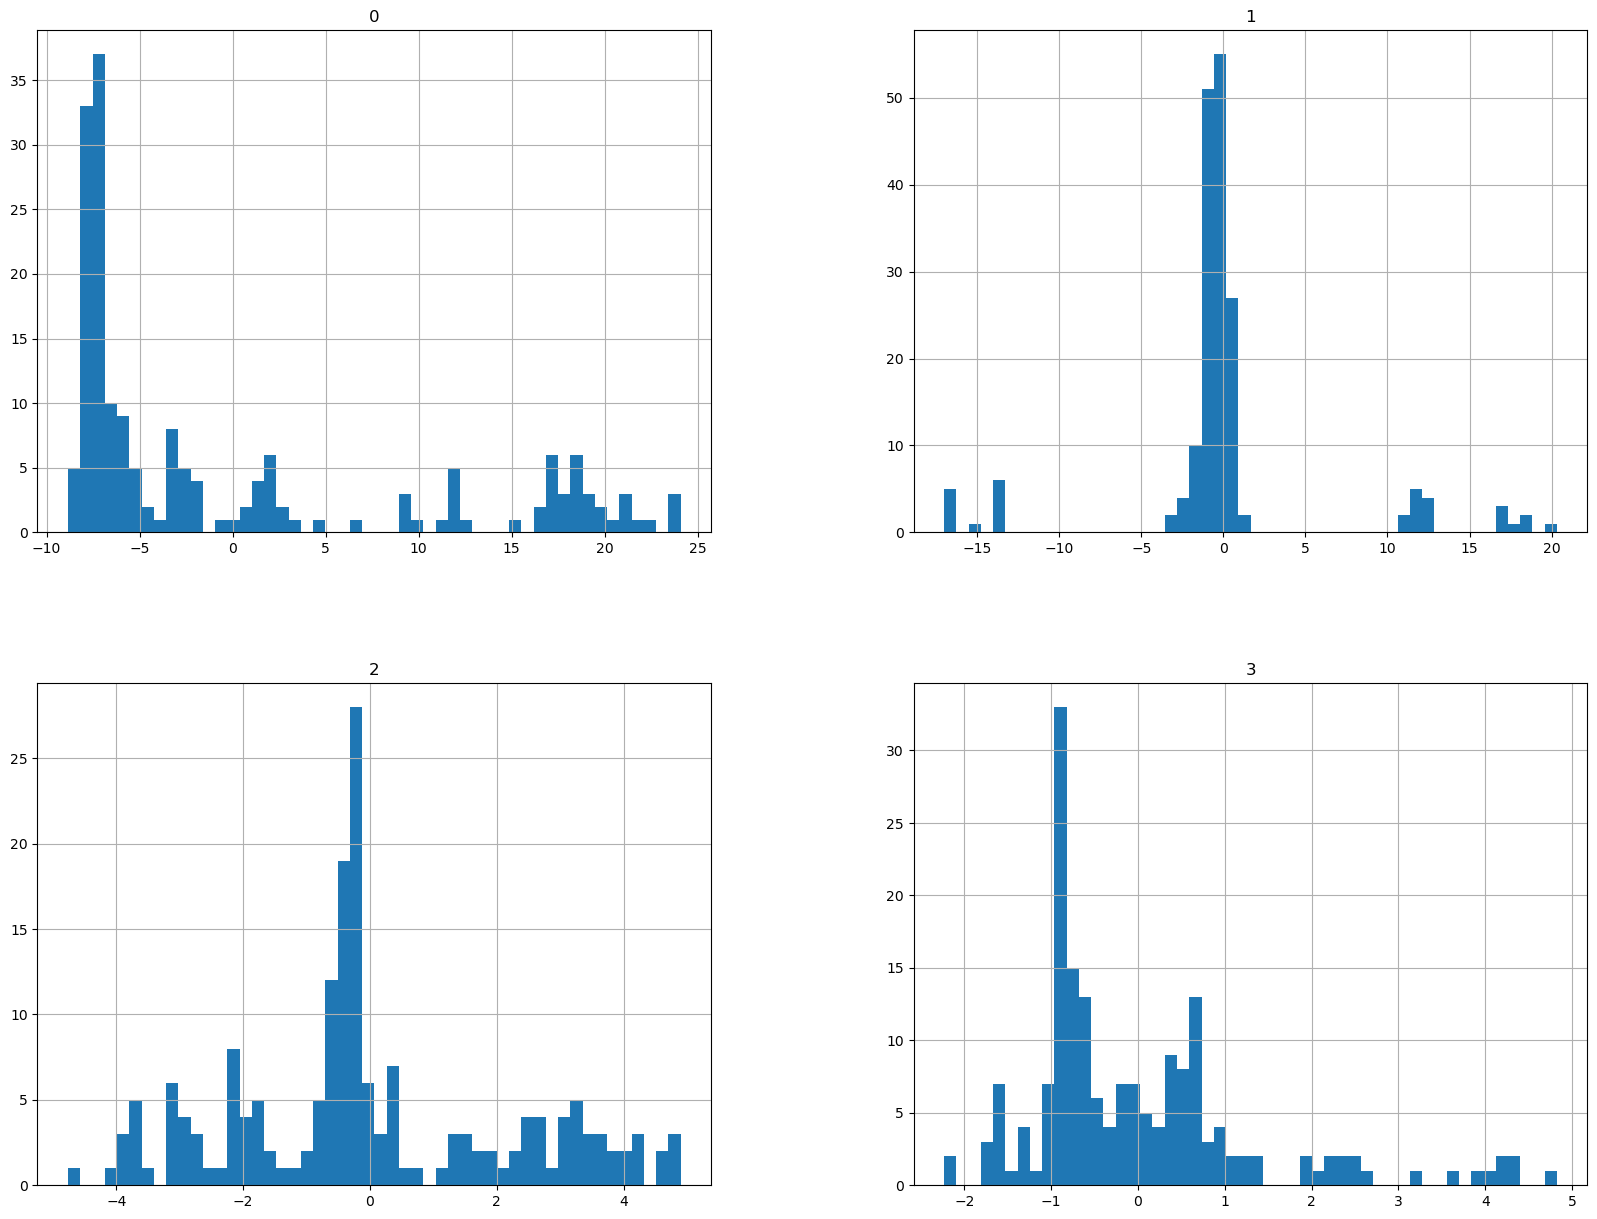

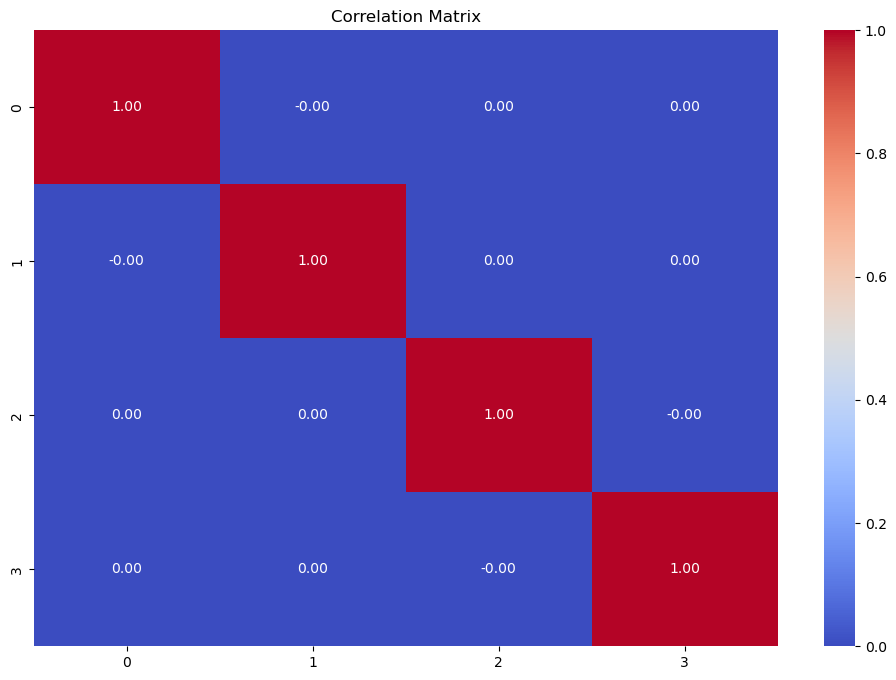

              0             1             2             3
0  1.000000e+00 -1.050983e-17  3.428989e-17  6.211487e-17
1 -1.050983e-17  1.000000e+00  1.049327e-16  3.205709e-16
2  3.428989e-17  1.049327e-16  1.000000e+00 -4.301986e-16
3  6.211487e-17  3.205709e-16 -4.301986e-16  1.000000e+00


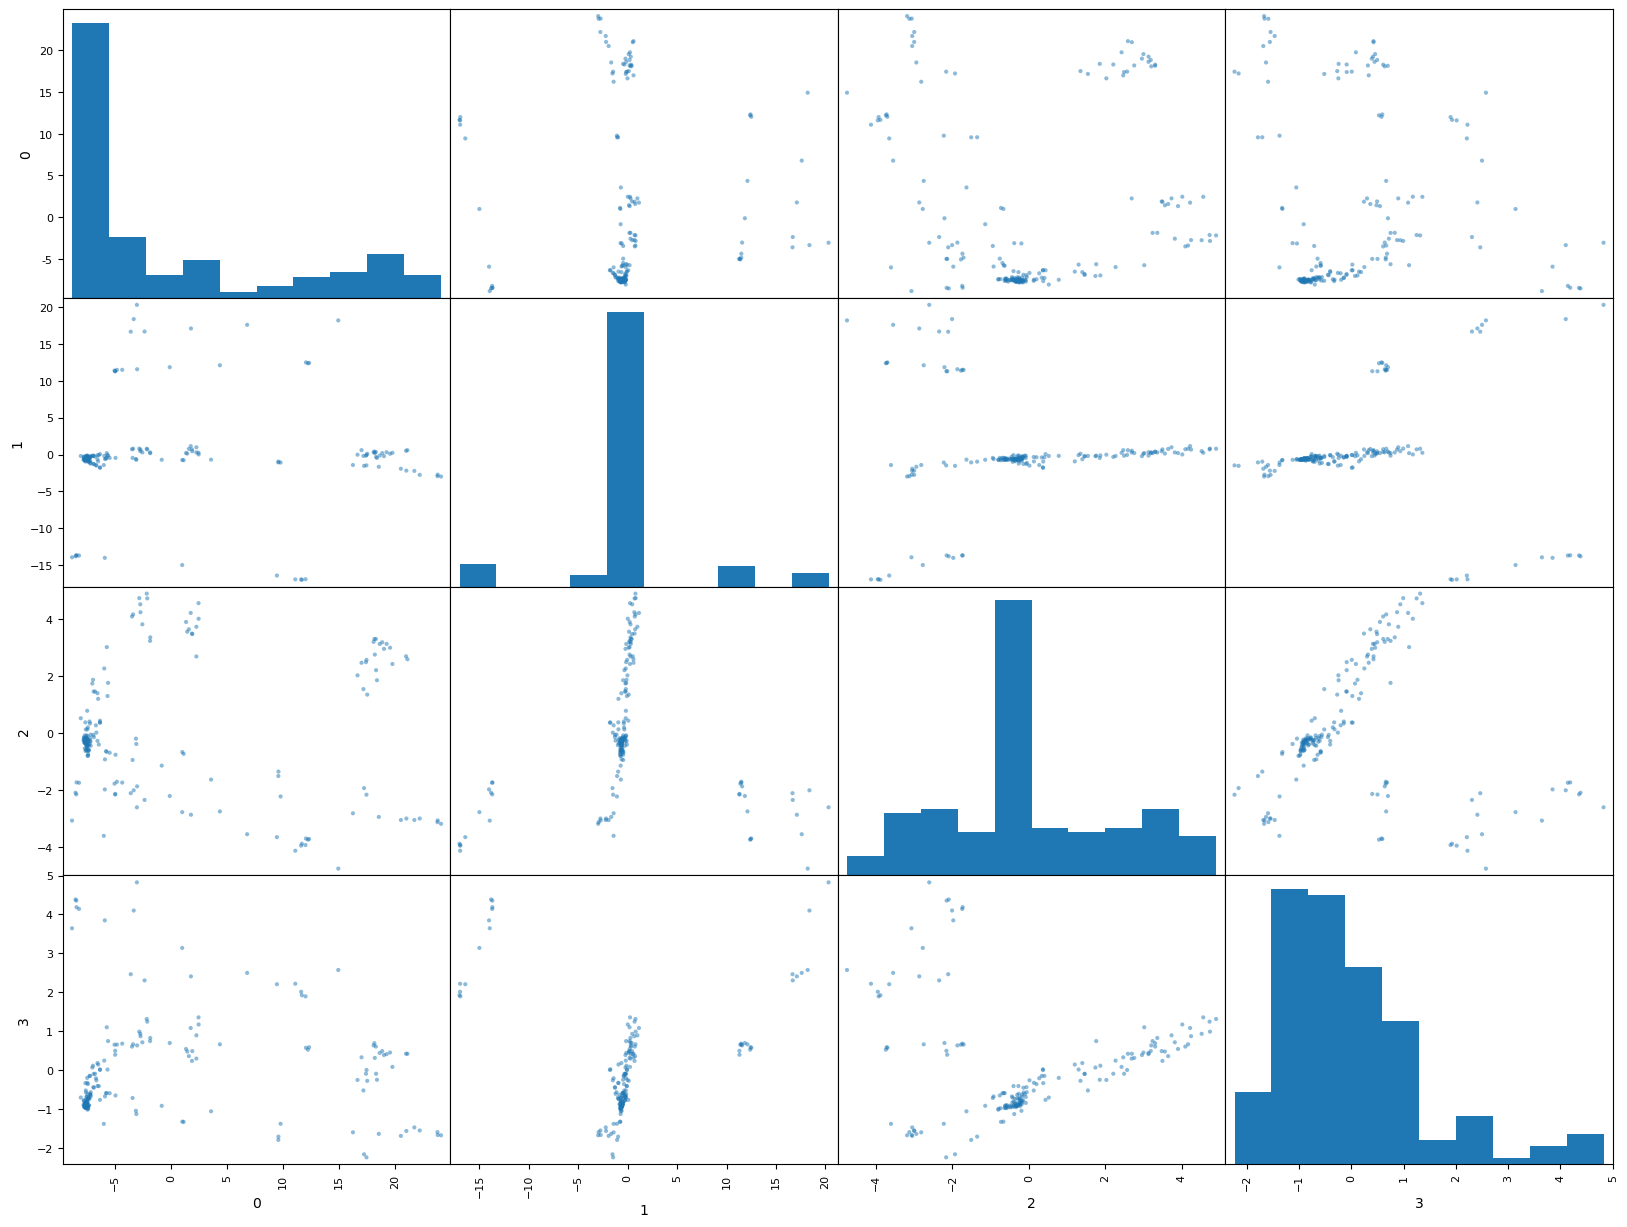

In [ ]:
# EDA with visualisations
data2.hist(bins=50, figsize=(20, 15)) # histogram of all columns
plt.show()

# Correlation matrix
corr_matrix = data2.corr()
print(corr_matrix)

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Scatter matrix
from pandas.plotting import scatter_matrix

scatter_matrix(data2, figsize=(20, 15))
plt.show()

## Insights from these plots

1. **Histograms**

- The first image shows histograms for the four different features obtained from PCA.

- Most of the distributions are skewed, with heavy concentrations around specific values.

- Some variables have multiple peaks, indicating possible multimodal distributions.


2. **Correlation Matrix**

- The correlation heatmap shows a diagonal of ones (self-correlation) and near-zero values elsewhere.

- This means that the four variables are almost uncorrelated with each other.

- There is no significant linear relationship between the variables.


3. **Scatter Plots**

- The scatter plots reveal potential clusters in the dataset.

- Some variables exhibit clear patterns, while others show dispersed points, reinforcing the weak correlation.

- The diagonal histograms confirm the distributions seen in the first image.

# Feature selection

In [62]:
# loop through the columns of target2 and do feature selection
for column in target2.columns:
    bestfeatures = SelectKBest(score_func=f_regression, k='all')
    fit = bestfeatures.fit(data2, target2[column])
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(data2.columns)

    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Specs', 'Score']
    print(f'\n\n{column}:\n')
    print(featureScores.nlargest(10, 'Score'))



Glucose (g/L):

   Specs      Score
2      2  49.891729
0      0  19.599900
3      3  14.324470
1      1   1.293569


Lactate (g/L):

   Specs      Score
0      0  20.142387
1      1   6.620072
2      2   2.380363
3      3   0.995089


Ethanol (g/L):

   Specs      Score
2      2  69.987250
0      0   5.527738
3      3   1.238604
1      1   0.000026


Acetate (g/L):

   Specs      Score
2      2  87.029599
0      0   7.276112
3      3   1.541332
1      1   0.013264


Biomass (g/L):

   Specs        Score
0      0  3116.040424
1      1     5.191704
2      2     1.534935
3      3     0.011575


Formate (g/L):

   Specs      Score
2      2  64.982565
0      0   6.135467
3      3   1.270660
1      1   0.018091


# Using 5-fold and 10-fold cross validation

In [67]:
from sklearn.model_selection import cross_val_score, KFold

# loop through the columns of target and find the best model for each column using data2 and target2. Do k-fold cross validation and take k as parameter to the function

def best_model2(X, y, k):

    models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), SVR(), KNeighborsRegressor(),
              GradientBoostingRegressor(), Ridge(), Lasso(), ElasticNet(), PLSRegression()]
    
    r2_scores = []
    rmse_scores = []

    for model in models:
        cv = KFold(n_splits=k, random_state=0, shuffle=True)
        r2_scores.append(np.mean(cross_val_score(model, X, y, cv=cv, scoring='r2')))
        rmse_scores.append(np.mean(np.sqrt(-cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error'))))

    model_scores = pd.DataFrame(sorted(list(zip([type(model).__name__ for model in models], r2_scores, rmse_scores)), key=lambda x: x[1], reverse=True), columns=['Model', 'R2 Score', 'RMSE'])

    return model_scores

In [68]:
for column in target2.columns:
    model_scores = best_model2(data2, target2[column].values, 5)
    print(f'\n\n{column}:\n')
    print(model_scores)



Glucose (g/L):

                       Model  R2 Score       RMSE
0  GradientBoostingRegressor  0.694359   8.496661
1      RandomForestRegressor  0.679867   8.759388
2        KNeighborsRegressor  0.583387  10.148742
3      DecisionTreeRegressor  0.517808  11.435914
4                      Lasso  0.325961  12.953170
5              PLSRegression  0.325730  12.933884
6                      Ridge  0.325576  12.935282
7           LinearRegression  0.325466  12.935820
8                 ElasticNet  0.322398  13.000637
9                        SVR  0.014933  15.728884


Lactate (g/L):

                       Model  R2 Score       RMSE
0      RandomForestRegressor  0.847212   5.860510
1  GradientBoostingRegressor  0.834631   5.910828
2        KNeighborsRegressor  0.802789   6.771063
3      DecisionTreeRegressor  0.674057   8.173654
4                      Ridge  0.143916  14.269881
5           LinearRegression  0.143909  14.269948
6              PLSRegression  0.143825  14.270688
7             

In [71]:
for column in target2.columns:
    model_scores = best_model2(data2, target2[column].values, 10)
    print(f'\n\n{column}:\n')
    print(model_scores)



Glucose (g/L):

                       Model  R2 Score       RMSE
0  GradientBoostingRegressor  0.720004   7.933160
1      RandomForestRegressor  0.707665   8.248783
2        KNeighborsRegressor  0.582599   9.817618
3      DecisionTreeRegressor  0.451238   9.375884
4                      Lasso  0.309967  12.829459
5              PLSRegression  0.307980  12.829790
6                      Ridge  0.307782  12.831329
7           LinearRegression  0.307645  12.832297
8                 ElasticNet  0.306652  12.865972
9                        SVR -0.005114  15.681898


Lactate (g/L):

                       Model  R2 Score       RMSE
0      RandomForestRegressor  0.804354   5.895791
1  GradientBoostingRegressor  0.796934   5.865008
2        KNeighborsRegressor  0.787170   6.478416
3      DecisionTreeRegressor  0.720957   5.643768
4              PLSRegression  0.165510  13.807363
5           LinearRegression  0.164524  13.813667
6                      Ridge  0.164512  13.813740
7             

In [69]:
for column in target2.columns:
    model_scores = best_model2(data, target[column].values, 5)
    print(f'\n\n{column}:\n')
    print(model_scores)

/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.859e+00, tolerance: 3.404e+00
  model = cd_fast.enet_coordinate_descent(
/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.259e+01, tolerance: 3.838e+00
  model = cd_fast.enet_coordinate_descent(
/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali



Glucose (g/L):

                       Model  R2 Score       RMSE
0           LinearRegression  0.989322   1.584067
1                      Ridge  0.969913   2.681685
2  GradientBoostingRegressor  0.816694   6.653386
3      RandomForestRegressor  0.784113   6.990727
4      DecisionTreeRegressor  0.680004   8.765560
5        KNeighborsRegressor  0.615944   9.663659
6                 ElasticNet  0.579220  10.196610
7                      Lasso  0.505922  11.078751
8              PLSRegression  0.189729  14.173983
9                        SVR  0.035712  15.562245


/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.047e+00, tolerance: 3.901e+00
  model = cd_fast.enet_coordinate_descent(
/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.381e+00, tolerance: 3.356e+00
  model = cd_fast.enet_coordinate_descent(
/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali



Lactate (g/L):

                       Model  R2 Score       RMSE
0           LinearRegression  0.968424   2.503579
1                      Ridge  0.911550   4.417482
2  GradientBoostingRegressor  0.814548   6.247055
3        KNeighborsRegressor  0.803783   6.708935
4      RandomForestRegressor  0.624646   7.845020
5      DecisionTreeRegressor  0.441483  11.660219
6                 ElasticNet  0.326894  12.528928
7                      Lasso  0.254141  13.285871
8              PLSRegression  0.146783  14.228819
9                        SVR -0.081774  16.024201


Ethanol (g/L):

                       Model  R2 Score      RMSE
0           LinearRegression  0.832782  0.267776
1                      Ridge  0.314483  0.643882
2        KNeighborsRegressor  0.293508  0.635253
3  GradientBoostingRegressor  0.286427  0.658718
4      RandomForestRegressor  0.270048  0.636407
5                        SVR  0.227640  0.689915
6              PLSRegression  0.220908  0.682999
7                     

/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.683e-02, tolerance: 2.648e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.463e-02, tolerance: 2.486e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali



Biomass (g/L):

                       Model  R2 Score      RMSE
0  GradientBoostingRegressor  0.996157  0.072925
1      RandomForestRegressor  0.995158  0.078165
2                      Ridge  0.991270  0.119735
3                        SVR  0.989828  0.129166
4      DecisionTreeRegressor  0.984055  0.144027
5           LinearRegression  0.982224  0.168744
6              PLSRegression  0.973591  0.209279
7        KNeighborsRegressor  0.967698  0.201716
8                 ElasticNet  0.818841  0.556333
9                      Lasso  0.371142  1.038573


Formate (g/L):

                       Model  R2 Score      RMSE
0           LinearRegression  0.711556  0.395540
1      RandomForestRegressor  0.397480  0.607546
2                      Ridge  0.385589  0.616721
3        KNeighborsRegressor  0.365434  0.637551
4  GradientBoostingRegressor  0.310569  0.642517
5              PLSRegression  0.232803  0.696521
6                        SVR  0.220479  0.710882
7                      Lasso -0.0

Glucose (g/L):

                       Model  R2 Score       RMSE
0           LinearRegression  0.989322   1.584067
1                      Ridge  0.969913   2.681685
2  GradientBoostingRegressor  0.816694   6.653386
3      RandomForestRegressor  0.784113   6.990727
4      DecisionTreeRegressor  0.680004   8.765560
5        KNeighborsRegressor  0.615944   9.663659
6                 ElasticNet  0.579220  10.196610
7                      Lasso  0.505922  11.078751
8              PLSRegression  0.189729  14.173983
9                        SVR  0.035712  15.562245


Lactate (g/L):

                       Model  R2 Score       RMSE
0           LinearRegression  0.968424   2.503579
1                      Ridge  0.911550   4.417482
2  GradientBoostingRegressor  0.814548   6.247055
3        KNeighborsRegressor  0.803783   6.708935
4      RandomForestRegressor  0.624646   7.845020
5      DecisionTreeRegressor  0.441483  11.660219
6                 ElasticNet  0.326894  12.528928
7                      Lasso  0.254141  13.285871
8              PLSRegression  0.146783  14.228819
9                        SVR -0.081774  16.024201


Ethanol (g/L):

                       Model  R2 Score      RMSE
0           LinearRegression  0.832782  0.267776
1                      Ridge  0.314483  0.643882
2        KNeighborsRegressor  0.293508  0.635253
3  GradientBoostingRegressor  0.286427  0.658718
4      RandomForestRegressor  0.270048  0.636407
5                        SVR  0.227640  0.689915
6              PLSRegression  0.220908  0.682999
7                      Lasso -0.065475  0.804872
8                 ElasticNet -0.065475  0.804872
9      DecisionTreeRegressor -0.582132  0.949693


Acetate (g/L):

                       Model  R2 Score      RMSE
0  GradientBoostingRegressor  0.493930  0.428433
1           LinearRegression  0.484333  0.433500
2      RandomForestRegressor  0.429798  0.464919
3                      Ridge  0.380705  0.486256
4        KNeighborsRegressor  0.352010  0.488664
5              PLSRegression  0.345285  0.500607
6                        SVR  0.330596  0.505648
7      DecisionTreeRegressor  0.122084  0.530868
8                      Lasso -0.007290  0.621688
9                 ElasticNet -0.007290  0.621688


Biomass (g/L):

                       Model  R2 Score      RMSE
0  GradientBoostingRegressor  0.996157  0.072925
1      RandomForestRegressor  0.995158  0.078165
2                      Ridge  0.991270  0.119735
3                        SVR  0.989828  0.129166
4      DecisionTreeRegressor  0.984055  0.144027
5           LinearRegression  0.982224  0.168744
6              PLSRegression  0.973591  0.209279
7        KNeighborsRegressor  0.967698  0.201716
8                 ElasticNet  0.818841  0.556333
9                      Lasso  0.371142  1.038573


Formate (g/L):

                       Model  R2 Score      RMSE
0           LinearRegression  0.711556  0.395540
1      RandomForestRegressor  0.397480  0.607546
2                      Ridge  0.385589  0.616721
3        KNeighborsRegressor  0.365434  0.637551
4  GradientBoostingRegressor  0.310569  0.642517
5              PLSRegression  0.232803  0.696521
6                        SVR  0.220479  0.710882
7                      Lasso -0.026770  0.813282
8                 ElasticNet -0.026770  0.813282
9      DecisionTreeRegressor -0.270916  0.848438

In [70]:
for column in target2.columns:
    model_scores = best_model2(data, target[column].values, 10)
    print(f'\n\n{column}:\n')
    print(model_scores)

/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.190e+01, tolerance: 4.247e+00
  model = cd_fast.enet_coordinate_descent(
/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+01, tolerance: 3.974e+00
  model = cd_fast.enet_coordinate_descent(
/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali



Glucose (g/L):

                       Model  R2 Score       RMSE
0           LinearRegression  0.990293   1.381572
1                      Ridge  0.970627   2.530772
2  GradientBoostingRegressor  0.817084   6.183623
3      RandomForestRegressor  0.796453   6.396545
4      DecisionTreeRegressor  0.712863   7.861289
5        KNeighborsRegressor  0.632710   9.066440
6                 ElasticNet  0.580929   9.975322
7                      Lasso  0.499107  10.923736
8              PLSRegression  0.166357  13.944016
9                        SVR  0.021947  15.473558


/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.261e+00, tolerance: 4.153e+00
  model = cd_fast.enet_coordinate_descent(
/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.914e+00, tolerance: 4.161e+00
  model = cd_fast.enet_coordinate_descent(
/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali



Lactate (g/L):

                       Model  R2 Score       RMSE
0           LinearRegression  0.966264   2.364255
1                      Ridge  0.909717   4.244703
2        KNeighborsRegressor  0.816280   6.049589
3  GradientBoostingRegressor  0.785097   6.261624
4      RandomForestRegressor  0.691981   6.855464
5      DecisionTreeRegressor  0.576033  10.210358
6                 ElasticNet  0.361179  11.965935
7                      Lasso  0.285181  12.763703
8              PLSRegression  0.151828  13.871907
9                        SVR -0.060737  15.497564


Ethanol (g/L):

                       Model  R2 Score      RMSE
0           LinearRegression  0.850244  0.225989
1        KNeighborsRegressor  0.199476  0.625747
2                      Ridge  0.187190  0.630315
3      RandomForestRegressor  0.160806  0.649484
4                        SVR  0.131979  0.680628
5              PLSRegression  0.078635  0.669150
6  GradientBoostingRegressor  0.050118  0.651872
7                     

/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.428e-02, tolerance: 2.867e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.964e-02, tolerance: 2.966e-02
  model = cd_fast.enet_coordinate_descent(
/Users/nisha/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali



Biomass (g/L):

                       Model  R2 Score      RMSE
0      RandomForestRegressor  0.995877  0.074049
1  GradientBoostingRegressor  0.994710  0.079840
2                        SVR  0.992018  0.108489
3                      Ridge  0.991826  0.112664
4           LinearRegression  0.983711  0.152490
5      DecisionTreeRegressor  0.982517  0.145375
6              PLSRegression  0.974976  0.197719
7        KNeighborsRegressor  0.969738  0.175578
8                 ElasticNet  0.818517  0.547726
9                      Lasso  0.359284  1.032424


Formate (g/L):

                       Model  R2 Score      RMSE
0           LinearRegression  0.513468  0.361486
1        KNeighborsRegressor  0.329992  0.573517
2                      Ridge  0.092524  0.594316
3      RandomForestRegressor  0.054271  0.584614
4                        SVR  0.043140  0.687242
5              PLSRegression -0.225485  0.680936
6                      Lasso -0.359392  0.798872
7                 ElasticNet -0.3

Glucose (g/L):

                       Model  R2 Score       RMSE
0           LinearRegression  0.990293   1.381572
1                      Ridge  0.970627   2.530772
2  GradientBoostingRegressor  0.817084   6.183623
3      RandomForestRegressor  0.796453   6.396545
4      DecisionTreeRegressor  0.712863   7.861289
5        KNeighborsRegressor  0.632710   9.066440
6                 ElasticNet  0.580929   9.975322
7                      Lasso  0.499107  10.923736
8              PLSRegression  0.166357  13.944016
9                        SVR  0.021947  15.473558


Lactate (g/L):

                       Model  R2 Score       RMSE
0           LinearRegression  0.966264   2.364255
1                      Ridge  0.909717   4.244703
2        KNeighborsRegressor  0.816280   6.049589
3  GradientBoostingRegressor  0.785097   6.261624
4      RandomForestRegressor  0.691981   6.855464
5      DecisionTreeRegressor  0.576033  10.210358
6                 ElasticNet  0.361179  11.965935
7                      Lasso  0.285181  12.763703
8              PLSRegression  0.151828  13.871907
9                        SVR -0.060737  15.497564


Ethanol (g/L):

                       Model  R2 Score      RMSE
0           LinearRegression  0.850244  0.225989
1        KNeighborsRegressor  0.199476  0.625747
2                      Ridge  0.187190  0.630315
3      RandomForestRegressor  0.160806  0.649484
4                        SVR  0.131979  0.680628
5              PLSRegression  0.078635  0.669150
6  GradientBoostingRegressor  0.050118  0.651872
7                      Lasso -0.129333  0.789789
8                 ElasticNet -0.129333  0.789789
9      DecisionTreeRegressor -0.627444  0.836076


Acetate (g/L):

                       Model  R2 Score      RMSE
0           LinearRegression  0.533363  0.368763
1  GradientBoostingRegressor  0.383658  0.390433
2      RandomForestRegressor  0.362672  0.432558
3              PLSRegression  0.242430  0.495205
4                        SVR  0.239343  0.492192
5                      Ridge  0.200528  0.482116
6        KNeighborsRegressor  0.165316  0.478221
7                      Lasso -0.088452  0.612253
8                 ElasticNet -0.088452  0.612253
9      DecisionTreeRegressor -0.358365  0.538884


Biomass (g/L):

                       Model  R2 Score      RMSE
0      RandomForestRegressor  0.995877  0.074049
1  GradientBoostingRegressor  0.994710  0.079840
2                        SVR  0.992018  0.108489
3                      Ridge  0.991826  0.112664
4           LinearRegression  0.983711  0.152490
5      DecisionTreeRegressor  0.982517  0.145375
6              PLSRegression  0.974976  0.197719
7        KNeighborsRegressor  0.969738  0.175578
8                 ElasticNet  0.818517  0.547726
9                      Lasso  0.359284  1.032424


Formate (g/L):

                       Model  R2 Score      RMSE
0           LinearRegression  0.513468  0.361486
1        KNeighborsRegressor  0.329992  0.573517
2                      Ridge  0.092524  0.594316
3      RandomForestRegressor  0.054271  0.584614
4                        SVR  0.043140  0.687242
5              PLSRegression -0.225485  0.680936
6                      Lasso -0.359392  0.798872
7                 ElasticNet -0.359392  0.798872
8  GradientBoostingRegressor -1.201344  0.585083
9      DecisionTreeRegressor -2.268900  0.697898

---

# Neural network

In [ ]:
from keras.models import Sequential, Model, load_model, Input
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
def create_model(input_shape):
    model = Sequential()
    model.add(Dense(64, input_shape=(input_shape,)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target['Acetate (g/L)'], test_size=0.2, random_state=0)

In [ ]:
model = create_model(X_train.shape[1])
model.summary()

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))

### implement a neural network model with optuna for hyperparameter tuning

In [ ]:
import optuna

def objective(trial):
    model = Sequential()
    model.add(Dense(trial.suggest_int('units1', 32, 256), input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(trial.suggest_float('dropout1', 0.1, 0.5)))
    model.add(Dense(trial.suggest_int('units2', 32, 256)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(trial.suggest_float('dropout2', 0.1, 0.5)))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0)

    return mean_squared_error(y_test, model.predict(X_test))

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

trial = study.best_trial
print('MSE: ', trial.value)
print('Best hyperparameters: ', trial.params)

In [ ]:
best_params = []

# loop through each column in target and find the best model using the best hyperparameters found by optuna
for column in target.columns:
    X_train, X_test, y_train, y_test = train_test_split(data, target[column], test_size=0.2, random_state=0)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

    def objective(trial):
        model = Sequential()
        model.add(Dense(trial.suggest_int('units1', 32, 256), input_shape=(X_train.shape[1],)))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(trial.suggest_float('dropout1', 0.1, 0.5)))
        model.add(Dense(trial.suggest_int('units2', 32, 256)))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(trial.suggest_float('dropout2', 0.1, 0.5)))
        model.add(Dense(1))

        model.compile(optimizer='adam', loss='mean_squared_error')

        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0)

        return mean_squared_error(y_test, model.predict(X_test))

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=100)

    trial = study.best_trial
    print(f'\n\n{column}:\n')
    print('MSE: ', trial.value)

    best_params.append(trial.params)

In [ ]:
# loop through each column but this time use the best hyperparameters found by optuna and find the r2 score and rmse score
for i, column in enumerate(target.columns):
    X_train, X_test, y_train, y_test = train_test_split(data, target[column], test_size=0.2, random_state=0)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

    model = Sequential()
    model.add(Dense(best_params[i]['units1'], input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(best_params[i]['dropout1']))
    model.add(Dense(best_params[i]['units2']))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(best_params[i]['dropout2']))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0)

    y_pred = model.predict(X_test)
    r2_score = model.evaluate(X_test, y_test)
    rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f'\n\n{column}:\n')
    print('R2 Score: ', r2_score)
    print('RMSE Score: ', rmse_score)

---

# Test the neural network models on the batch experiment data

In [ ]:
new_data = pd.read_csv('data/new_data.csv')
new_target = pd.read_csv('data/new_target.csv')

In [ ]:
for i, column in enumerate(new_target.columns):
    X_train, X_test, y_train, y_test = train_test_split(data, target[column], test_size=0.2, random_state=0)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

    model = Sequential()
    model.add(Dense(best_params[i]['units1'], input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(best_params[i]['dropout1']))
    model.add(Dense(best_params[i]['units2']))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(best_params[i]['dropout2']))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0)

    y_pred = model.predict(new_data)
    r2_score = model.evaluate(new_data, new_target[column])
    rmse_score = np.sqrt(mean_squared_error(new_target[column], y_pred))

    print(f'\n\n{column}:\n')
    print('R2 Score: ', r2_score)
    print('RMSE Score: ', rmse_score)

---

# Using the unlabelled data

In [ ]:
unlabelled_data = pd.read_csv('data/unlabelled.csv')
data3 = pd.read_csv('data/data.csv')
target3 = pd.read_csv('data/target.csv')

# Adding the batch experiment data

In [ ]:
data3 = pd.concat([data3, new_data], axis=0)
target3 = pd.concat([target3, new_target], axis=0)

In [ ]:
# integrate the unlabelled data (data with no target) into the labelled data for better scaling and normalization
data3 = pd.concat([data3, unlabelled_data], axis=0)

# Baseline correction
data3 = data3 - data3.min()

# Normalization
data3 = data3 / data3.max()

# Noise reduction using smoothing techniques
data3 = savgol_filter(data3, 5, 2)

# not doing pca because it only shows worse performance in the different models
# # Multiple scatter correction to reduce scattering effects
# data3 = pca.transform(data3)
# data3 = pd.DataFrame(data3)

# remove the unlabelled data from the complete data to get the labelled data
data3 = data3.iloc[:len(data3) - len(unlabelled_data)]

# loop through each column in target3 and find the best model using the best hyperparameters found by optuna


In [ ]:
for column in target3.columns:
    X_train, X_test, y_train, y_test = train_test_split(data3, target3[column], test_size=0.2, random_state=0)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

    def objective(trial):
        model = Sequential()
        model.add(Dense(trial.suggest_int('units1', 32, 256), input_shape=(X_train.shape[1],)))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(trial.suggest_float('dropout1', 0.1, 0.5)))
        model.add(Dense(trial.suggest_int('units2', 32, 256)))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(trial.suggest_float('dropout2', 0.1, 0.5)))
        model.add(Dense(1))

        model.compile(optimizer='adam', loss='mean_squared_error')

        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0)

        return mean_squared_error(y_test, model.predict(X_test))

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=100)

    trial = study.best_trial
    print(f'\n\n{column}:\n')
    print('MSE: ', trial.value)

    best_params.append(trial.params)

# loop through each column but this time use the best hyperparameters found by optuna and find the r2 score and rmse score

In [ ]:
for i, column in enumerate(target3.columns):
    X_train, X_test, y_train, y_test = train_test_split(data3, target3[column], test_size=0.2, random_state=0)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

    model = Sequential()
    model.add(Dense(best_params[i]['units1'], input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(best_params[i]['dropout1']))
    model.add(Dense(best_params[i]['units2']))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(best_params[i]['dropout2']))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0)

    y_pred = model.predict(X_test)
    r2_score = model.evaluate(X_test, y_test)
    rmse_score = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f'\n\n{column}:\n')
    print('R2 Score: ', r2_score)
    print('RMSE Score: ', rmse_score)

# also find the best regression model for each column in target3 using best_model2 function with k=5 (10 gives better results but takes longer time)

In [ ]:
for column in target3.columns:
    model_scores = best_model2(data3, target3[column].values, 5)
    print(f'\n\n{column}:\n')
    print(model_scores)

# also find the best regression model for each column in target3 using best_model2 function with k=10

In [ ]:
for column in target3.columns:
    model_scores = best_model2(data3, target3[column].values, 10)
    print(f'\n\n{column}:\n')
    print(model_scores) 